validate the model date: True


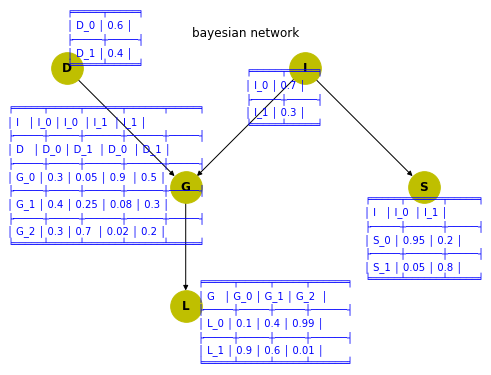

In [2]:
import networkx as nx

from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

import matplotlib.pyplot as plt
%matplotlib inline


# construct backbone of a simple Bayesian network 
model = BayesianModel([('D', 'G'), ('I', 'G'), ('G', 'L'), ('I', 'S')])

# set the CPD for 'D' and 'I'
cpd_d = TabularCPD(variable='D', variable_card=2, values=[[0.6, 0.4]])  # D: course hard(0,1)
cpd_i = TabularCPD(variable='I', variable_card=2, values=[[0.7, 0.3]])  # I: student inteligent(0,1)

# set CPD for other node（row is index of current node，column is index of parent node）
cpd_g = TabularCPD(variable='G', variable_card=3,       # G: examination grade (0,1,2)
                   values=[[0.3, 0.05, 0.9,  0.5],
                           [0.4, 0.25, 0.08, 0.3],
                           [0.3, 0.7,  0.02, 0.2]],
                  evidence=['I', 'D'],
                  evidence_card=[2, 2])
cpd_s = TabularCPD(variable='S', variable_card=2,       # S: SAT grade(0,1)
                   values=[[0.95, 0.2],
                           [0.05, 0.8]],
                   evidence=['I'],
                   evidence_card=[2])
cpd_l = TabularCPD(variable='L', variable_card=2,       # L: recommand level(0,1)
                   values=[[0.1, 0.4, 0.99],
                           [0.9, 0.6, 0.01]],
                   evidence=['G'],
                   evidence_card=[3])

# add each CPD into the Bayesian network
model.add_cpds(cpd_d, cpd_i, cpd_g, cpd_l, cpd_s)

# validate the model date
print('validate the model date:',model.check_model())
      
# draw the Bayesian network
nx.draw(model, with_labels=True, node_size=1000, font_weight='bold', node_color='y', \
        pos={"L":[4,3],"G":[4,5],"S":[8,5],"D":[2,7],"I":[6,7]})
plt.text(2,7,model.get_cpds("D"), fontsize=10, color='b')
plt.text(5,6,model.get_cpds("I"), fontsize=10, color='b')
plt.text(1,4,model.get_cpds("G"), fontsize=10, color='b')
plt.text(4.2,2,model.get_cpds("L"), fontsize=10, color='b')
plt.text(7,3.4,model.get_cpds("S"), fontsize=10, color='b')
plt.title('bayesian network')
plt.show()

In [3]:
# check the independencies
model.get_independencies()

(D _|_ I, S)
(D _|_ L | G)
(D _|_ S | I)
(D _|_ I | S)
(D _|_ L, S | G, I)
(D _|_ L | G, S)
(D _|_ S | L, I)
(D _|_ S | G, L, I)
(D _|_ L | G, I, S)
(G _|_ S | I)
(G _|_ S | D, I)
(G _|_ S | L, I)
(G _|_ S | D, L, I)
(I _|_ D)
(I _|_ L | G)
(I _|_ D | S)
(I _|_ L | D, G)
(I _|_ L | G, S)
(I _|_ L | D, G, S)
(L _|_ D, I, S | G)
(L _|_ S | I)
(L _|_ I, S | D, G)
(L _|_ S | D, I)
(L _|_ D, S | G, I)
(L _|_ D, I | G, S)
(L _|_ S | D, G, I)
(L _|_ I | D, G, S)
(L _|_ D | G, I, S)
(S _|_ D)
(S _|_ L | G)
(S _|_ D, G, L | I)
(S _|_ L | D, G)
(S _|_ G, L | D, I)
(S _|_ D, L | G, I)
(S _|_ D, G | L, I)
(S _|_ L | D, G, I)
(S _|_ G | D, L, I)
(S _|_ D | G, L, I)

In [4]:
# Doing some simple queries on the network
model.is_active_trail('D', 'I')

False

In [5]:
model.is_active_trail('D', 'I', observed=['G'])

True

In [11]:
print(model.get_cpds('G'))

╒═════╤═════╤══════╤══════╤═════╕
│ I   │ I_0 │ I_0  │ I_1  │ I_1 │
├─────┼─────┼──────┼──────┼─────┤
│ D   │ D_0 │ D_1  │ D_0  │ D_1 │
├─────┼─────┼──────┼──────┼─────┤
│ G_0 │ 0.3 │ 0.05 │ 0.9  │ 0.5 │
├─────┼─────┼──────┼──────┼─────┤
│ G_1 │ 0.4 │ 0.25 │ 0.08 │ 0.3 │
├─────┼─────┼──────┼──────┼─────┤
│ G_2 │ 0.3 │ 0.7  │ 0.02 │ 0.2 │
╘═════╧═════╧══════╧══════╧═════╛


In [5]:
# Causal Inference (form above  down)

from pgmpy.inference import VariableElimination
infer = VariableElimination(model)

q = infer.query(variables=['L'], evidence={})
print(q['L'])

q = infer.query(variables=['L'], evidence={'I':0})
print(q['L'])

q = infer.query(variables=['L'], evidence={'I':0, 'D':0})
print(q['L'])

╒═════╤══════════╕
│ L   │   phi(L) │
╞═════╪══════════╡
│ L_0 │   0.4977 │
├─────┼──────────┤
│ L_1 │   0.5023 │
╘═════╧══════════╛
╒═════╤══════════╕
│ L   │   phi(L) │
╞═════╪══════════╡
│ L_0 │   0.6114 │
├─────┼──────────┤
│ L_1 │   0.3886 │
╘═════╧══════════╛
╒═════╤══════════╕
│ L   │   phi(L) │
╞═════╪══════════╡
│ L_0 │   0.4870 │
├─────┼──────────┤
│ L_1 │   0.5130 │
╘═════╧══════════╛


In [22]:
# Evidence Inference (from down up)

q = infer.query(variables=['I'], evidence={})
print(q['I'])

q = infer.query(variables=['I'], evidence={'G':2})
print(q['I'])

q = infer.query(variables=['I'], evidence={'L':0})
print(q['I'])

╒═════╤══════════╕
│ I   │   phi(I) │
╞═════╪══════════╡
│ I_0 │   0.7000 │
├─────┼──────────┤
│ I_1 │   0.3000 │
╘═════╧══════════╛
╒═════╤══════════╕
│ I   │   phi(I) │
╞═════╪══════════╡
│ I_0 │   0.9211 │
├─────┼──────────┤
│ I_1 │   0.0789 │
╘═════╧══════════╛
╒═════╤══════════╕
│ I   │   phi(I) │
╞═════╪══════════╡
│ I_0 │   0.8600 │
├─────┼──────────┤
│ I_1 │   0.1400 │
╘═════╧══════════╛
